# Find the frequency of words in a webpage

In [92]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk 
import re
import urllib.request 
from bs4 import BeautifulSoup as bs
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mallikarjuna.m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
#Extract data from web_page
web_page= urllib.request.urlopen('http://php.net/') 
html = web_page.read() 
data = bs(html,"html5lib") 
string = data.get_text(strip=True) 
words = [i for i in string.split()] 

In [68]:
len(words)

3328

In [86]:
#pre-process the extracted data
corpus = []
for i in range(0, len(words)):
    review = re.sub('[^a-zA-Z]', ' ', words[i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [87]:
while '' in corpus:
    corpus.remove('')

In [88]:
corpus

['php',
 'hypertext',
 'preprocessordownloadsdocumentationget',
 'involvedhelpget',
 'startedintroductiona',
 'simpl',
 'tutoriallanguag',
 'referencebas',
 'syntaxtypesvariablesconstantsexpressionsoperatorscontrol',
 'structuresfunctionsclass',
 'objectsnamespaceserrorsexceptionsgeneratorsrefer',
 'explainedpredefin',
 'variablespredefin',
 'exceptionspredefin',
 'interfac',
 'classescontext',
 'option',
 'parameterssupport',
 'protocol',
 'wrapperssecurityintroductiongener',
 'considerationsinstal',
 'cgi',
 'binaryinstal',
 'apach',
 'modulesess',
 'securityfilesystem',
 'securitydatabas',
 'securityerror',
 'reportingus',
 'regist',
 'globalsus',
 'submit',
 'datamag',
 'quoteshid',
 'phpkeep',
 'currentfeatureshttp',
 'authent',
 'phpcookiessessionsd',
 'xformshandl',
 'file',
 'uploadsus',
 'remot',
 'filesconnect',
 'handlingpersist',
 'databas',
 'connectionssaf',
 'modecommand',
 'line',
 'usagegarbag',
 'collectiondtrac',
 'dynam',
 'tracingfunct',
 'referenceaffect',
 'php',

In [93]:
#Word Frequency count and disply of top 10 words by frequency
freq = nltk.FreqDist(corpus) 
word_list = pd.DataFrame([[key,value] for key,value in freq.items()],columns=["Words","Freq"])
top_10 = word_list.sort_values(by=['Freq'],ascending=False).head(10)

In [94]:
top_10

,Words,Freq
0,php,180
142,releas,107
155,found,68
147,sourc,48
157,list,39
146,version,35
158,chang,33
235,report,31
133,develop,29
135,announc,27


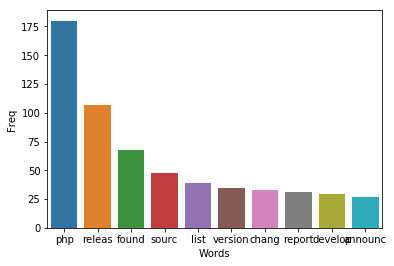

In [103]:
sns.barplot(x='Words', y= 'Freq', data=top_10)